<div>
    <img src='../pics/banner.PNG'/>
</div>
<div>
    <img width="10%" height="10%" src='../pics/python-programming.png'/>
    <img src='../pics/miw.PNG'/>
</div>
<div>
    <em>Author: Jeroen Boogaard</em>
</div>

<h1>Samengestelde variabelen - Sets</h1>

**Een set is een <u>mutable</u> dataverzameling van <u>unieke</u> elementen.**

<div>
    <img width="25%" height="25%" src='../pics/pioneer.jpg'/>
</div>

<h3>Imports</h3>

In [4]:
!(pip list | grep geopandas) && (pip list | grep matplotlib-venn) && (pip list | grep contextily) || pip install -r ../../pip/requirements.txt

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     --- ------------------------------------ 0.1/1.1 MB ? eta -:--:--
     -------- ------------------------------- 0.2/1.1 MB 3.5 MB/s eta 0:00:01
     -------------------- ------------------- 0.5/1.1 MB 4.2 MB/s eta 0:00:01
     ------------------------- -------------- 0.7/1.1 MB 3.9 MB/s eta 0:00:01
     ------------------------------- -------- 0.8/1.1 MB 4.1 MB/s eta 0:00:01
     ------------------------------- -------- 0.8/1.1 MB 4.1 MB/s eta 0:00:01
     ------------------------------- -------- 0.8/1.1 MB 4.1 MB/s eta 0:00:01
     ------------------------------- -------- 0.8/1.1 MB 4.1 MB/s eta 0:00:01
     ------------------------------- -------- 0.8/1.1 MB 4.1 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/119.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/119.8 kB ? eta -:--:--
     -----

In [5]:
import contextily as ctx
import geopandas as gpd
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

<h3>Set variabelen aanmaken en afdrukken</h3>


In [13]:
spaceCrafts = set()
spaceCrafts = {"Pioneer"}
print(spaceCrafts)

{'Pioneer'}


In [15]:
spaceCrafts.add("Voyager")

In [16]:
print(spaceCrafts)

{'Voyager', 'Pioneer'}


<h3>Exercise 1</h3>
<h4>Gegeven</h4>

In [27]:
def fiboSeqList(n):
    if n <= 1:
        return n
    else:
        return(fiboSeqList(n-1) + fiboSeqList(n-2))
    
fibonacciList = [fiboSeqList(i) for i in range(0,15)]    
print(fibonacciList)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


<h4>Gevraagd</h4>
<p>Maak gebruik van <u>cast</u> om variabele <i>fibonacciList</i> te ontdubbelen</p>

<h4>Oplossing</h4>

In [2]:
def fiboSeqList(n):
    if n <= 1:
        return n
    else:
        return(fiboSeqList(n-1) + fiboSeqList(n-2))
    
fibonacciList = [fiboSeqList(i) for i in range(0,15)]

# verander list in set
# sorted() 

fibonacciSet = set(fibonacciList)
print(sorted(fibonacciSet))

#(sorted) slaat niet op.  .sort() werkt beter. 


[0, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


<h3>Operaties</h3>

In [31]:
nordics = {"Denmark", "Finland", "Iceland", "Norway"}
baltics = {"Estonia", "Latvia", "Lithuania"}
eu = {"Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"}

<h3>Exercise 2</h3>
<h4>Gegeven</h4>

In [32]:
benelux = {"Belgium", "Netherlands", "Luxembourg"}
benStr = ""
benList = list()

<h4>Gevraagd</h4>
<ul>
<li>Maak een String benStr met als <u>value</u> "BeNeLux" die is opgebouwd uit de letters van corresponderende items uit de set <i>benelux</i> zonder de set variabele zelf aan te passen</li>
<li>Maak een List benList met als <u>value</u> ["BE", "NL" "LU"] die is opgebouwd uit de letters van corresponderende items uit de set <i>benelux</i> zonder de set variabele zelf aan te passen</li>
</ul>

<h4>Oplossing</h4>

In [36]:
benelux = {"Belgium", "Netherlands", "Luxembourg"}
benStr = "BeNeLux"
benList = list(["BE", "NL", "LU"])

<h3>Visualisatie</h3>

**We gebruiken geopandas voor het visualiseren van een landkaart en filteren op de 2-letterige landcode**

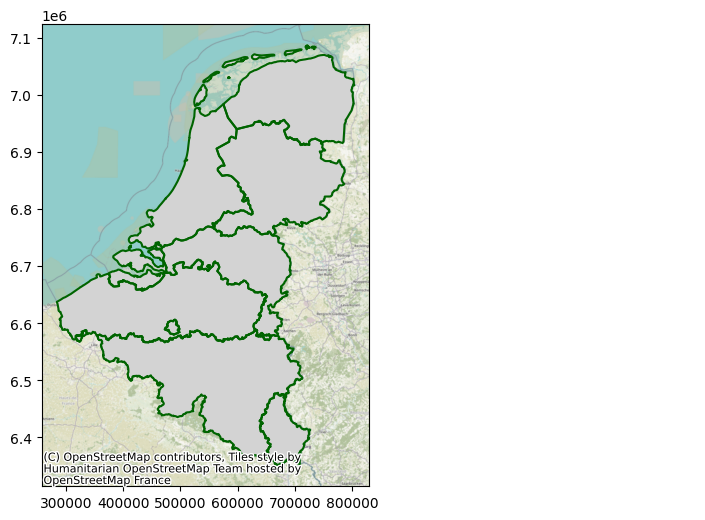

In [39]:
# Geografische data inlezen
#data dir aangepast + ../

data_dir = "../../geo/ref-nuts-2021-01m/"
euPath = data_dir + "NUTS_RG_01M_2021_3035_LEVL_1.json"
gdf = gpd.read_file(euPath)

# Coordinatensysteem
gdf.crs = "EPSG:3035"

# Filteren landen m.b.v. codes uit benList
gdfBen = gdf[(gdf.CNTR_CODE == benList[0]) | (gdf.CNTR_CODE == benList[1]) | (gdf.CNTR_CODE == benList[2])] if len(benList)==3 else gdf[(gdf.CNTR_CODE == "NL")]

# Conversie Coordinaten
gdfCrsBen = gdfBen.to_crs("EPSG:3857")

# Plot
ax = gdfCrsBen.plot(figsize=(8,6), color="lightgray")

# Grenzen Benelux landen
gdfCrsBen.boundary.plot(color="darkgreen", ax=ax)

# Achtergrondkaart
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.HOT)

**Gebruik <i>union</i> om verzamelingen verenigen**

In [40]:
subUnion = benelux.union(nordics).union(baltics)
print(subUnion)

{'Latvia', 'Norway', 'Estonia', 'Denmark', 'Belgium', 'Lithuania', 'Luxembourg', 'Finland', 'Netherlands', 'Iceland'}


<p>De Sets benelux, nordics en baltics zijn allen een eigen <strong>subset</strong> van eu</p>

<p>Niet alle landen uit <i>subUnion</i> zijn lid van de Europese Unie</p>

In [41]:
baltics.issubset(eu) and benelux.issubset(eu) and nordics.issubset(eu)

False

**Gebruik de methode <i>intersection</i> voor de doorsnede van twee Sets**

In [42]:
eu.intersection(nordics)

{'Denmark', 'Finland'}

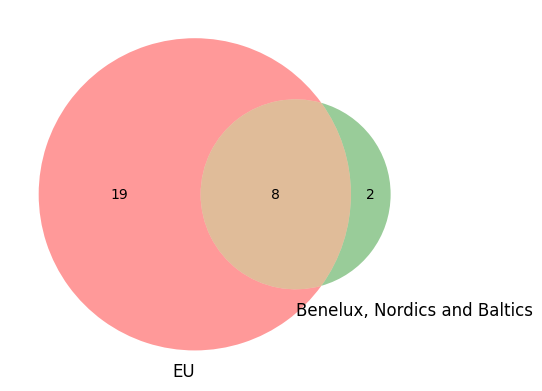

In [43]:
venn2([eu, subUnion], ('EU', 'Benelux, Nordics and Baltics'))
plt.show()

<h3>Exercise 3</h3>
<h4>Gegeven</h4>
<p>EU lidstaten die de euro (nog) niet hebben ingevoerd</p>

In [44]:
nonEuro = ['Bulgaria', 'Czech Republic', 'Denmark', 'Hungary', 'Poland', 'Romania', 'Sweden']

<h4>Gevraagd</h4>
<p>Gebruik de methode <u>difference</u> om EU landen weer te geven die <u>wel</u> lid zijn van de Eurozone</p>

<h4>Oplossing</h4>

In [50]:
nonEuro = {'Bulgaria', 'Czech Republic', 'Denmark', 'Hungary', 'Poland', 'Romania', 'Sweden'}
eu = {"Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"}

#in eu "Czechia" aangepast naar "Czech Republic"

Eurozone= eu.difference(nonEuro)
print(Eurozone)



{'Italy', 'Portugal', 'Latvia', 'Austria', 'Belgium', 'Greece', 'France', 'Slovenia', 'Ireland', 'Netherlands', 'Cyprus', 'Germany', 'Malta', 'Estonia', 'Lithuania', 'Finland', 'Slovakia', 'Luxembourg', 'Croatia', 'Spain'}
